In [96]:
from processing_functions import *
%matplotlib inline

In [97]:
# reading datasets
personal_data = pd.read_csv('./dataset/Ovarian/ovar_data_mar22_d032222.csv')
screen_data = pd.read_csv('./dataset/Ovarian/Screening/ovar_screen_data_mar22_d032222.csv')
screen_abnorm_data = pd.read_csv('./dataset/Ovarian/Screening Abnormalities/ovar_scrsub_data_mar22_d032222.csv')

In [98]:
personal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78209 entries, 0 to 78208
Columns: 242 entries, ovar_reasfoll to in_TGWAS_population
dtypes: float64(191), int64(48), object(3)
memory usage: 144.4+ MB


In [99]:
personal_data.head()

,ovar_reasfoll,ovar_reassurv,ovar_reassymp,ovar_reasoth,ovar_cancer,ovar_intstat_cat,ovar_annyr,ovar_cancer_site,ovar_stage,ovar_stage_7e,...,sex,age,agelevel,dual,reconsent_outcome,reconsent_outcome_days,fstcan_exitstat,fstcan_exitage,fstcan_exitdays,in_TGWAS_population
0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,2,74,3,0,5,5621,8,87,4672,1
1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,2,63,1,0,1,4106,8,72,3386,1
2,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,2,59,0,0,1,5864,8,72,4969,1
3,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,2,57,0,0,1,4687,8,68,4106,1
4,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,2,62,1,0,2,6126,8,78,5573,1


In [100]:
personal_data_nan_cols = [i for i in personal_data.columns if personal_data[i].isnull().any()]
personal_data_drop_features = [col for col in personal_data_nan_cols if col.startswith('ovar_')]
print(f'Number of features that are result of the cancer diagnosis: {len(personal_data_drop_features)}')
# Drop features that are result of the cancer diagnosis
# personal_data = personal_data.drop(personal_data_drop_features, axis=1)

Number of features that are result of the cancer diagnosis: 36


In [101]:
def print_records_vs_unique(df, col, dataset_name):
    # Get unique IDs
    print(f"Num of records in {dataset_name} dataset: {len(df)}")
    print(f"Num of unique {col} in {dataset_name} dataset: {len(df[col].unique())}")

print_records_vs_unique(personal_data, 'plco_id', 'personal')
# Check the number of people with cancer
personal_data_cancer = personal_data[personal_data['ovar_cancer']==1]
print(f"Num of patients with cancer: {len(personal_data_cancer)}")
# Check the number of people without cancer
personal_data_no_cancer = personal_data[personal_data['ovar_cancer']==0]
print(f"Num of patients without cancer: {len(personal_data_no_cancer)}")

Num of records in personal dataset: 78209
Num of unique plco_id in personal dataset: 78209
Num of patients with cancer: 613
Num of patients without cancer: 77596


In [102]:
# get percentage values missing
def get_missing_values_cols(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                    'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    missing_value_df = missing_value_df[missing_value_df.percent_missing != 0]
    return missing_value_df
personal_data_missing_value = get_missing_values_cols(personal_data)
missing_90_or_more = personal_data_missing_value[personal_data_missing_value.percent_missing >= 90]
missing_50_or_more = personal_data_missing_value[personal_data_missing_value.percent_missing >= 50]

In [103]:
personal_data_missing_value.describe().T

,count,mean,std,min,25%,50%,75%,max
percent_missing,192.0,42.622026,38.383291,2.677441,3.349359,50.001918,69.834674,99.937347


In [104]:
missing_50_or_more

,column_name,percent_missing
tvu_result3,tvu_result3,50.001918
tvu_result0,tvu_result0,50.001918
tvu_result1,tvu_result1,50.001918
ca125_result4,ca125_result4,50.001918
ca125_result1,ca125_result1,50.001918
...,...,...
ovar_clinstage_t,ovar_clinstage_t,99.845286
ovar_clinstage_n,ovar_clinstage_n,99.850401
ovar_clinstage_7e,ovar_clinstage_7e,99.874695
ovar_clinstage,ovar_clinstage,99.881088


In [105]:
def print_records_vs_unique_for(df, col, dataset_name, on):
    print_records_vs_unique(df, col, dataset_name)
    # Look at unique IDs for each of the years of study for screen dataset
    for val in sorted(df[on].unique()):
        # Get unique IDs
        print_records_vs_unique(df[df[on] == val], col, f'{dataset_name}.{on}={val}')

print_records_vs_unique_for(screen_data, 'plco_id', 'screen', 'study_yr')

Num of records in screen dataset: 150993
Num of unique plco_id in screen dataset: 30849
Num of records in screen.study_yr=0 dataset: 28919
Num of unique plco_id in screen.study_yr=0 dataset: 28919
Num of records in screen.study_yr=1 dataset: 27607
Num of unique plco_id in screen.study_yr=1 dataset: 27607
Num of records in screen.study_yr=2 dataset: 26637
Num of unique plco_id in screen.study_yr=2 dataset: 26637
Num of records in screen.study_yr=3 dataset: 25459
Num of unique plco_id in screen.study_yr=3 dataset: 25459
Num of records in screen.study_yr=4 dataset: 20146
Num of unique plco_id in screen.study_yr=4 dataset: 20146
Num of records in screen.study_yr=5 dataset: 22225
Num of unique plco_id in screen.study_yr=5 dataset: 22225


In [106]:
personal_data_cancer['plco_id']  

104      A-008936-9
253      A-019088-5
535      A-033695-0
549      A-034487-0
563      A-035099-2
            ...    
77530    Z-139804-0
77695    Z-146095-6
77767    Z-148291-8
78001    Z-155932-9
78034    Z-156832-0
Name: plco_id, Length: 613, dtype: object

In [107]:
screen_data['plco_id']

0         A-001979-6
1         A-001979-6
2         A-001979-6
3         A-001979-6
4         A-001979-6
             ...    
150988    Z-162169-9
150989    Z-162169-9
150990    Z-162169-9
150991    Z-162169-9
150992    Z-162286-1
Name: plco_id, Length: 150993, dtype: object

In [125]:
personal_data_cancer[['plco_id', 'ovar_cancer_diagdays', 'fstcan_exitdays', 'ovar_exitdays']].describe().T

,count,mean,std,min,25%,50%,75%,max
ovar_cancer_diagdays,613.0,2751.973899,1751.601513,5.0,1213.0,2745.0,4137.0,6895.0
fstcan_exitdays,613.0,2512.432300,1596.348029,5.0,1068.0,2564.0,3826.0,5800.0
ovar_exitdays,613.0,2647.187602,1606.080617,5.0,1213.0,2745.0,3929.0,5804.0


In [121]:
len(personal_data_cancer[personal_data_cancer['ovar_cancer_diagdays']<5*365])

221

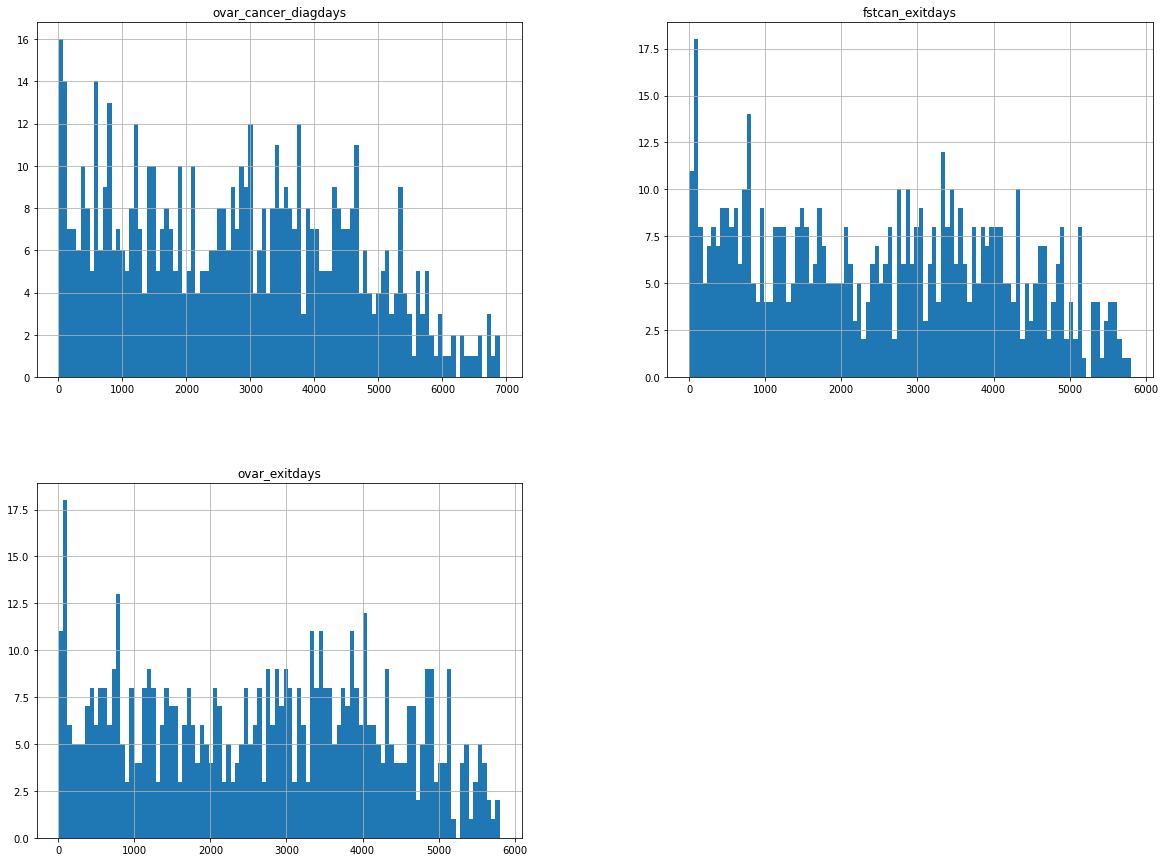

In [124]:
personal_data_cancer[['plco_id', 'ovar_cancer_diagdays', 'fstcan_exitdays', 'ovar_exitdays']].hist(figsize=(20,15), bins=100);

In [109]:
# Merge cancer patients dataset with screen dataset and see missing values
merged_data_cancer = personal_data_cancer.merge(screen_data, on='plco_id', how='left')

In [110]:
print_records_vs_unique_for(merged_data_cancer, 'plco_id', 'merged_data_cancer', 'study_yr')

Num of records in merged_data_cancer dataset: 1516
Num of unique plco_id in merged_data_cancer dataset: 613
Num of records in merged_data_cancer.study_yr=0.0 dataset: 281
Num of unique plco_id in merged_data_cancer.study_yr=0.0 dataset: 281
Num of records in merged_data_cancer.study_yr=1.0 dataset: 240
Num of unique plco_id in merged_data_cancer.study_yr=1.0 dataset: 240
Num of records in merged_data_cancer.study_yr=2.0 dataset: 215
Num of unique plco_id in merged_data_cancer.study_yr=2.0 dataset: 215
Num of records in merged_data_cancer.study_yr=3.0 dataset: 199
Num of unique plco_id in merged_data_cancer.study_yr=3.0 dataset: 199
Num of records in merged_data_cancer.study_yr=5.0 dataset: 138
Num of unique plco_id in merged_data_cancer.study_yr=5.0 dataset: 138
Num of records in merged_data_cancer.study_yr=nan dataset: 0
Num of unique plco_id in merged_data_cancer.study_yr=nan dataset: 0
Num of records in merged_data_cancer.study_yr=4.0 dataset: 127
Num of unique plco_id in merged_dat

In [111]:
merged_data_cancer

,ovar_reasfoll,ovar_reassurv,ovar_reassymp,ovar_reasoth,ovar_cancer,ovar_intstat_cat,ovar_annyr,ovar_cancer_site,ovar_stage,ovar_stage_7e,...,build_incidence_cutoff_y,ca125_days,ca125i_assess_days,ca125ii_assess_days,ovar_days,tvu_assess_days_q,tvu_days,tvudays_pvis1,tvudays_pvis2,tvudays_pvis3
0,1.0,NaN,0.0,0.0,1,5.0,0.0,1.0,330.0,330.0,...,1.0,15.0,28.0,NaN,15.0,NaN,15.0,15.0,NaN,NaN
1,NaN,NaN,NaN,NaN,1,3.0,13.0,3.0,NaN,NaN,...,1.0,65.0,NaN,71.0,65.0,NaN,65.0,65.0,NaN,NaN
2,NaN,NaN,NaN,NaN,1,3.0,13.0,3.0,NaN,NaN,...,1.0,812.0,NaN,820.0,812.0,NaN,812.0,812.0,NaN,NaN
3,NaN,NaN,NaN,NaN,1,3.0,13.0,3.0,NaN,NaN,...,1.0,1262.0,NaN,1268.0,1262.0,NaN,1262.0,1262.0,NaN,NaN
4,0.0,NaN,1.0,0.0,1,3.0,8.0,1.0,330.0,330.0,...,1.0,31.0,37.0,NaN,31.0,NaN,31.0,31.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1.0,NaN,1.0,0.0,1,5.0,1.0,1.0,330.0,330.0,...,1.0,0.0,NaN,8.0,0.0,NaN,0.0,0.0,NaN,NaN
1512,1.0,NaN,1.0,0.0,1,5.0,1.0,1.0,330.0,330.0,...,1.0,336.0,NaN,344.0,336.0,NaN,336.0,336.0,NaN,NaN
1513,1.0,NaN,1.0,0.0,1,5.0,1.0,1.0,330.0,330.0,...,1.0,701.0,NaN,709.0,701.0,NaN,701.0,701.0,NaN,NaN
1514,1.0,NaN,0.0,0.0,1,5.0,0.0,1.0,310.0,310.0,...,1.0,74.0,NaN,82.0,74.0,NaN,74.0,74.0,NaN,NaN


In [112]:
# Determine on which features to use mean imputation and on which ones to replace with -1

In [113]:
# Calculate years before cancer

In [114]:
# Turn screen dataset into features

In [115]:
# For the screening dataset merge all 'inad_' into 1? 

 The initial dataset had 181 variables (Appendix 1). Variables were ranked by their F-score, which is the harmonic mean of precision and recall, with those with an F-score closest to 1.0 demonstrating high correlation with treatment success [10]. Experts in the treatment of BPH also selected variables for inclusion into the models irrespective of the F-Score, these variables, plus those with a high F-Score were selected for inclusion in initial model development.. The actual variables used by our models were a subset of these, and the number in any given fold and subgroup was dynamically determined by treating this as a hyper-parameter and tuning it as described below.